In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


In [3]:
# Substitua 'acidentes_2024.csv' pelo caminho para o seu arquivo CSV
df = pd.read_csv('datatran2024.csv', sep=';', encoding='latin1')
df.head(3)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,"-4,29603281","-41,76732659",SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47703 entries, 0 to 47702
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      47703 non-null  float64
 1   data_inversa            47703 non-null  object 
 2   dia_semana              47703 non-null  object 
 3   horario                 47703 non-null  object 
 4   uf                      47703 non-null  object 
 5   br                      47703 non-null  int64  
 6   km                      47703 non-null  object 
 7   municipio               47703 non-null  object 
 8   causa_acidente          47703 non-null  object 
 9   tipo_acidente           47703 non-null  object 
 10  classificacao_acidente  47702 non-null  object 
 11  fase_dia                47703 non-null  object 
 12  sentido_via             47703 non-null  object 
 13  condicao_metereologica  47703 non-null  object 
 14  tipo_pista              47703 non-null

## Pre-processing

In [5]:
df.isnull().sum()

id                         0
data_inversa               0
dia_semana                 0
horario                    0
uf                         0
br                         0
km                         0
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     1
fase_dia                   0
sentido_via                0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
regional                   1
delegacia                 14
uop                       81
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 1 to 47702
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      47621 non-null  float64
 1   data_inversa            47621 non-null  object 
 2   dia_semana              47621 non-null  object 
 3   horario                 47621 non-null  object 
 4   uf                      47621 non-null  object 
 5   br                      47621 non-null  int64  
 6   km                      47621 non-null  object 
 7   municipio               47621 non-null  object 
 8   causa_acidente          47621 non-null  object 
 9   tipo_acidente           47621 non-null  object 
 10  classificacao_acidente  47621 non-null  object 
 11  fase_dia                47621 non-null  object 
 12  sentido_via             47621 non-null  object 
 13  condicao_metereologica  47621 non-null  object 
 14  tipo_pista              47621 non-null  obj

## Conversão de Tipos de Dados

In [8]:
# Converter 'data_inversa' para datetime
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

# Converter 'horario' para datetime.time
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S').dt.time

# Converter 'km' para float (substituir vírgulas por pontos, se necessário)
df['km'] = df['km'].str.replace(',', '.').astype(float)

# Converter 'latitude' e 'longitude' para float
df['latitude'] = df['latitude'].str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].str.replace(',', '.').astype(float)


## Correção de Formatos

In [9]:
# Remover espaços extras e padronizar strings
cols_str = ['dia_semana', 'uf', 'municipio', 'causa_acidente', 'tipo_acidente',
            'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica',
            'tipo_pista', 'tracado_via', 'uso_solo', 'regional', 'delegacia', 'uop']

for col in cols_str:
    df[col] = df[col].str.strip().str.upper()


# Análise Exploratória de Dados (EDA)

In [10]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

## Distribuição da Classificação dos Acidentes

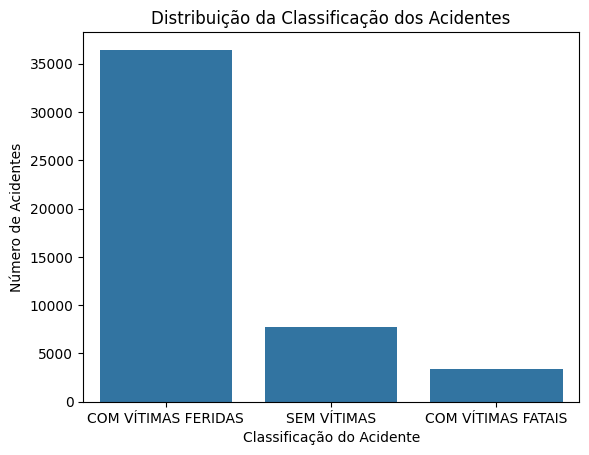

In [11]:
# Contagem de acidentes por classificação
class_counts = df['classificacao_acidente'].value_counts()

# Plot
sns.countplot(x='classificacao_acidente', data=df, order=class_counts.index)
plt.title('Distribuição da Classificação dos Acidentes')
plt.xlabel('Classificação do Acidente')
plt.ylabel('Número de Acidentes')
plt.show()


Observamos a distribuição dos tipos de acidentes (com vítimas fatais, com feridos, sem vítimas).
Isso nos dá uma ideia de como as classes estão balanceadas.

## Acidentes por Dia da Semana

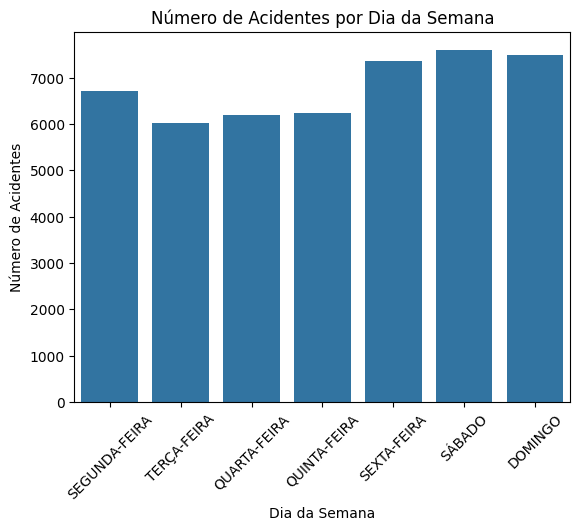

In [12]:
# Ordem dos dias da semana
dias_semana = ['SEGUNDA-FEIRA', 'TERÇA-FEIRA', 'QUARTA-FEIRA', 'QUINTA-FEIRA', 'SEXTA-FEIRA', 'SÁBADO', 'DOMINGO']

# Plot
sns.countplot(x='dia_semana', data=df, order=dias_semana)
plt.title('Número de Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()


## Acidentes por Horário do Dia

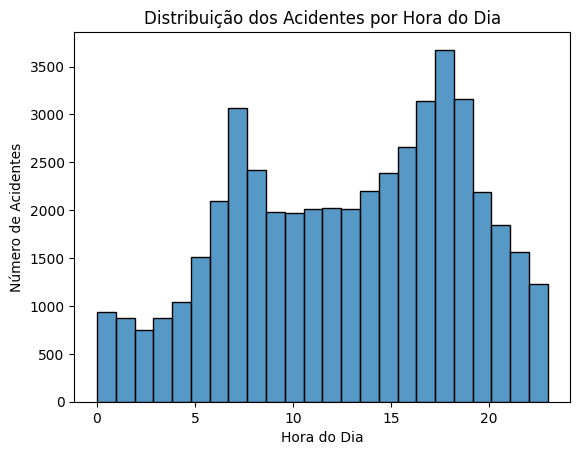

In [13]:
# Extraindo a hora
df['HORA'] = df['horario'].apply(lambda x: x.hour)

# Plot
sns.histplot(df['HORA'], bins=24, kde=False)
plt.title('Distribuição dos Acidentes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.show()


picos de acidentes em determinados horários.
Pode estar relacionado ao horário de pico.

## Análise Espacial dos Acidentes

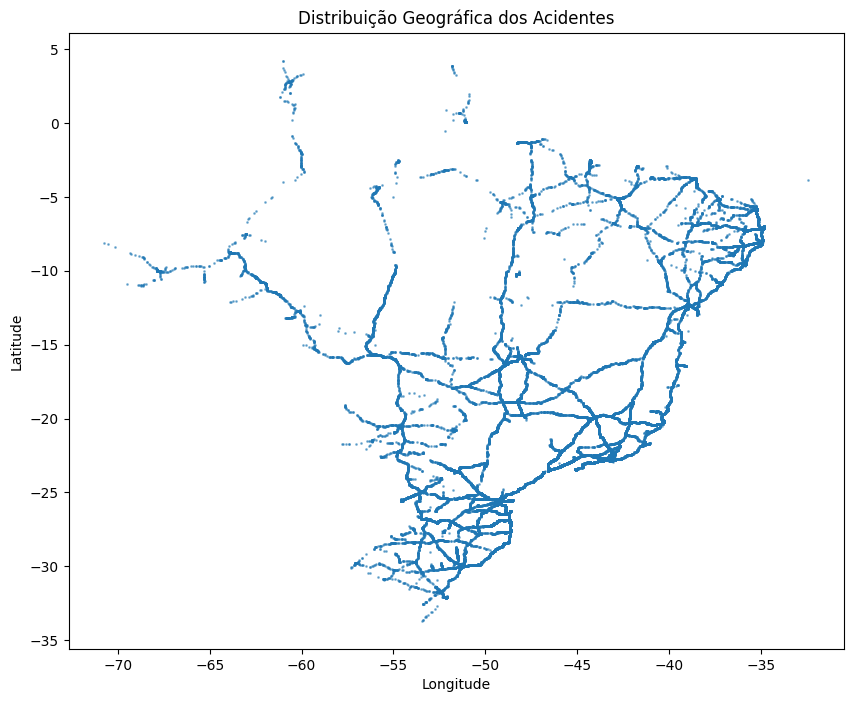

In [14]:
# Plot geográfico usando scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, s=1)
plt.title('Distribuição Geográfica dos Acidentes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Relação entre Condição Meteorológica e Classificação do Acidente

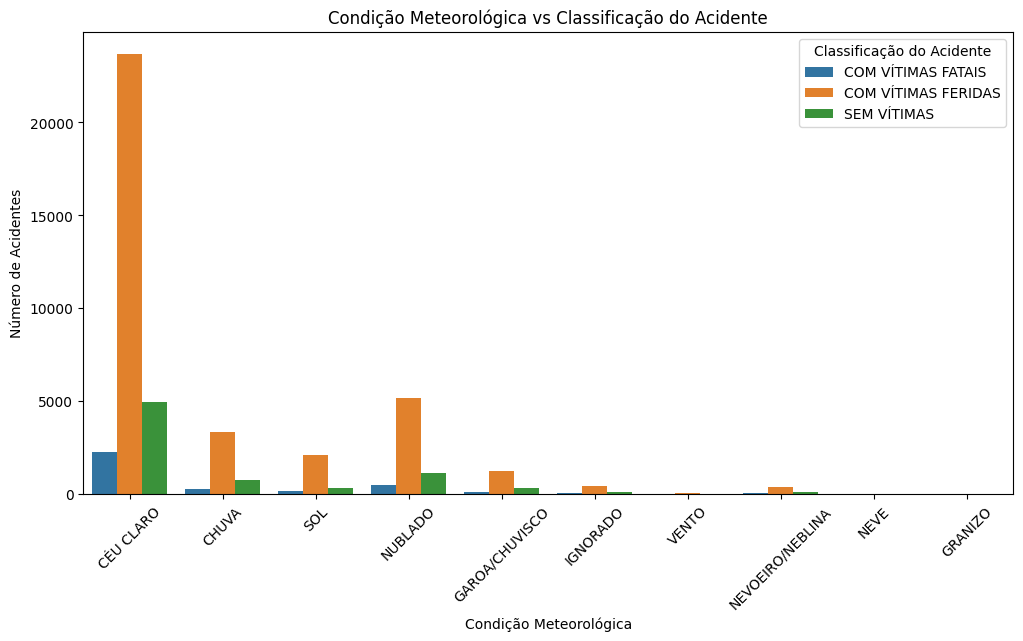

In [15]:
# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='condicao_metereologica', data=df, hue='classificacao_acidente')
plt.title('Condição Meteorológica vs Classificação do Acidente')
plt.xlabel('Condição Meteorológica')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.legend(title='Classificação do Acidente')
plt.show()


Surpreendentemente CEU CLARO  esta associado a acidentes mais graves.

In [16]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'HORA'],
      dtype='object')

## Causas dos Acidentes

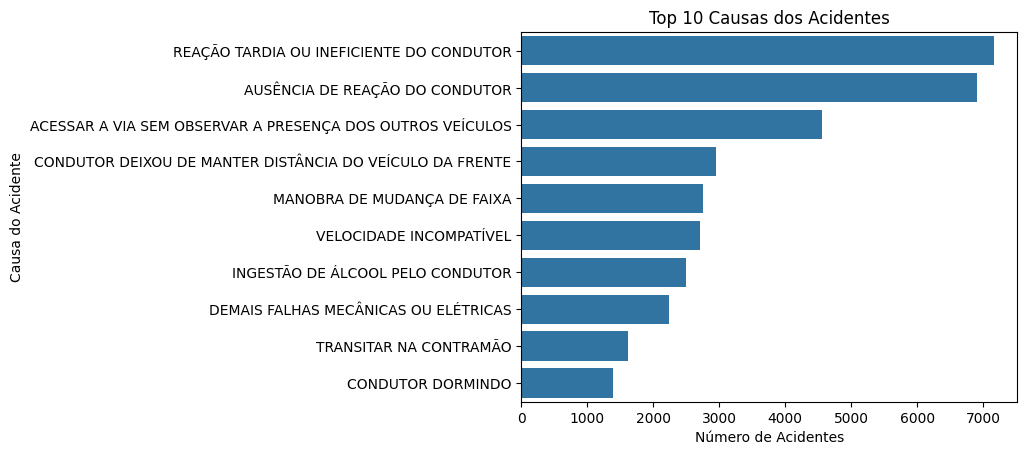

In [17]:
# Top 10 causas
top_causas = df['causa_acidente'].value_counts().head(10)

# Plot
sns.countplot(y='causa_acidente', data=df, order=top_causas.index)
plt.title('Top 10 Causas dos Acidentes')
plt.xlabel('Número de Acidentes')
plt.ylabel('Causa do Acidente')
plt.show()


##  Relação entre Tipo de Pista e Severidade do Acidente

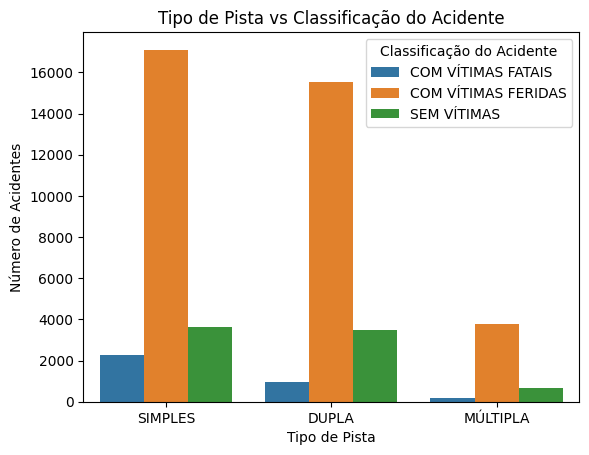

In [18]:
# Plot
sns.countplot(x='tipo_pista', data=df, hue='classificacao_acidente')
plt.title('Tipo de Pista vs Classificação do Acidente')
plt.xlabel('Tipo de Pista')
plt.ylabel('Número de Acidentes')
plt.legend(title='Classificação do Acidente')
plt.show()


VEja que o tipo de pista influencia na gravidade dos acidentes COM VITIMAS FATAIS!

## Feature Engineering

Nesta etapa, vamos criar novas variáveis e selecionar aquelas que são mais relevantes para o modelo.
- Criação de Novas Variáveis

    Período do Dia: Manhã, Tarde, Noite, Madrugada
    Final de Semana: Sim ou Não
    Quantidade Total de Feridos: Soma de feridos leves e graves
    Gravidade do Acidente: Criar uma variável numérica para representar a severidade

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 1 to 47702
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      47621 non-null  float64       
 1   data_inversa            47621 non-null  datetime64[ns]
 2   dia_semana              47621 non-null  object        
 3   horario                 47621 non-null  object        
 4   uf                      47621 non-null  object        
 5   br                      47621 non-null  int64         
 6   km                      47621 non-null  float64       
 7   municipio               47621 non-null  object        
 8   causa_acidente          47621 non-null  object        
 9   tipo_acidente           47621 non-null  object        
 10  classificacao_acidente  47621 non-null  object        
 11  fase_dia                47621 non-null  object        
 12  sentido_via             47621 non-null  object     

In [20]:
# Período do Dia
def get_periodo_dia(hora):
    if 5 <= hora < 12:
        return 'MANHÃ'
    elif 12 <= hora < 18:
        return 'TARDE'
    elif 18 <= hora < 24:
        return 'NOITE'
    else:
        return 'MADRUGADA'

df['PERIODO_DIA'] = df['HORA'].apply(get_periodo_dia)

# Final de Semana
df['FINAL_DE_SEMANA'] = df['dia_semana'].apply(lambda x: 1 if x in ['SÁBADO', 'DOMINGO'] else 0)

# Quantidade Total de Feridos
df['TOTAL_FERIDOS'] = df['feridos_leves'] + df['feridos_graves']

# Gravidade do Acidente (mapear para valores numéricos)
gravidade_mapping = {
    'SEM VÍTIMAS': 0,
    'COM VÍTIMAS FERIDAS': 1,
    'COM VÍTIMAS FATAIS': 2
}
df['GRAVIDADE'] = df['classificacao_acidente'].map(gravidade_mapping)


## Preparação dos Dados para o Modelo
Usamos OneHotEncoder para variáveis categóricas nominais e LabelEncoder para ordinais.

In [21]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'HORA', 'PERIODO_DIA', 'FINAL_DE_SEMANA',
       'TOTAL_FERIDOS', 'GRAVIDADE'],
      dtype='object')

In [22]:
# Selecionar features e target
features = ['dia_semana', 'uf', 'causa_acidente', 'tipo_acidente', 
            'condicao_metereologica',  'tipo_pista', 'tracado_via', 
            'PERIODO_DIA', 'sentido_via', 'uso_solo',  'fase_dia', 
            'FINAL_DE_SEMANA', 'HORA', 'km', 'veiculos', 'pessoas', 
            'TOTAL_FERIDOS']


X = df[features]
y = df['GRAVIDADE']

# Identificar colunas categóricas e numéricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Aplicar OneHotEncoder
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

## Normalização

In [23]:

# Padronização das variáveis numéricas
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])


##  Divisão em Conjuntos de Treinamento e Teste

In [24]:
# A divisão estratificada garante que a proporção das classes seja mantida em ambos os conjuntos.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


# Construção e Treinamento do Modelo
- Seleção de Algoritmos

Vamos testar vários algoritmos:

    - Random Forest
    - Gradient Boosting (XGBoost)
    - Logistic Regression

Implementaremos uma função para treinar e avaliar os modelos.

In [25]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Função para treinar e avaliar modelos
# Função para treinar e avaliar modelos
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Prever no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Avaliar o modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(
        y_test, y_pred,
        target_names=['Sem Vítimas', 'Com Vítimas Feridas', 'Com Vítimas Fatais'],
        output_dict=True
    )
    
    # Exibir resultados
    print(f"Modelo: {model_name}")
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(
        y_test, y_pred,
        target_names=['Sem Vítimas', 'Com Vítimas Feridas', 'Com Vítimas Fatais']
    ))
    
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Sem Vítimas', 'Com Vítimas Feridas', 'Com Vítimas Fatais'],
        yticklabels=['Sem Vítimas', 'Com Vítimas Feridas', 'Com Vítimas Fatais']
    )
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - {model_name}')
    
    # **Salvar a figura**
    # Substituir espaços por underscores no nome do arquivo
    sanitized_model_name = model_name.replace(' ', '_')
    plt.savefig(f"confusion_matrix_{sanitized_model_name}.png")
    
    # Fechar a figura para liberar memória
    plt.close()
    
    return accuracy, report



In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Função para aplicar técnicas de balanceamento
def apply_sampling(sampling_technique, X_train, y_train):
    if sampling_technique == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif sampling_technique == 'SMOTEENN':
        sampler = SMOTEENN(random_state=42)
    else:
        return X_train, y_train  # Sem balanceamento
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

In [27]:
# Função para realizar GridSearchCV
def perform_grid_search(model, param_grid, X, y, scoring='f1_macro'):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,
        scoring=scoring,
        n_jobs=-1
    )
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model.__class__.__name__}:")
    print(grid_search.best_params_)
    return best_model

# Avaliação dos Modelos em Diferentes Cenários
## Modelos a serem avaliados

In [28]:

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}


In [29]:
# Dicionário para armazenar os resultados
results = {}

## Avaliação Sem Balanceamento

In [30]:
# Importações para o MLflow
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from mlflow.models.signature import infer_signature

# Inicialização do experimento no MLflow
mlflow.set_experiment("Acidentes de Trânsito sem pesos nas classes")

for model_name, model in models.items():
    with mlflow.start_run(run_name=f"{model_name} Sem Balanceamento"):
        print(f"\nAvaliação do {model_name} sem balanceamento:")
        # Treinar e avaliar o modelo
        accuracy, report = train_evaluate_model(
            model, X_train, y_train, X_test, y_test, model_name + " Sem Balanceamento"
        )
        results[(model_name, 'Sem Balanceamento')] = report
        
        # Logar parâmetros no MLflow
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("scenario", "Sem Balanceamento")
        
        # Logar métricas no MLflow
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score_fatal", report['Com Vítimas Fatais']['f1-score'])
        mlflow.log_metric("recall_fatal", report['Com Vítimas Fatais']['recall'])
        mlflow.log_metric("precision_fatal", report['Com Vítimas Fatais']['precision'])
        
        # Salvar a matriz de confusão como artefato
        # Salvar a matriz de confusão como artefato
        sanitized_model_name = (model_name + " Sem Balanceamento").replace(' ', '_')
        mlflow.log_artifact(f"confusion_matrix_{sanitized_model_name}.png")
        
        # Logar o modelo usando infer_signature()
        signature = infer_signature(X_train, model.predict(X_train))
        if model_name == 'XGBoost':
            mlflow.xgboost.log_model(model, artifact_path="model", signature=signature)
        else:
            mlflow.sklearn.log_model(model, artifact_path="model", signature=signature)


2024/10/14 19:44:34 INFO mlflow.tracking.fluent: Experiment with name 'Acidentes de Trânsito sem pesos nas classes' does not exist. Creating a new experiment.



Avaliação do Random Forest sem balanceamento:
Modelo: Random Forest Sem Balanceamento
Accuracy: 0.9453018372703412

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.87      0.98      0.92      1553
Com Vítimas Feridas       0.97      1.00      0.98      7291
 Com Vítimas Fatais       0.86      0.28      0.43       681

           accuracy                           0.95      9525
          macro avg       0.90      0.75      0.78      9525
       weighted avg       0.94      0.95      0.93      9525


Avaliação do XGBoost sem balanceamento:
Modelo: XGBoost Sem Balanceamento
Accuracy: 0.9448818897637795

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.88      0.96      0.92      1553
Com Vítimas Feridas       0.97      0.99      0.98      7291
 Com Vítimas Fatais       0.73      0.37      0.49       681

           accuracy                           0.94      

/home/hub/anaconda3/envs/prfml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:45:00] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



Avaliação do Logistic Regression sem balanceamento:
Modelo: Logistic Regression Sem Balanceamento
Accuracy: 0.9382677165354331

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.88      0.98      0.92      1553
Com Vítimas Feridas       0.96      0.99      0.98      7291
 Com Vítimas Fatais       0.68      0.29      0.40       681

           accuracy                           0.94      9525
          macro avg       0.84      0.75      0.77      9525
       weighted avg       0.93      0.94      0.93      9525



# 7.3. Avaliação com SMOTE

In [31]:
# Aplicar SMOTE
X_train_smote, y_train_smote = apply_sampling('SMOTE', X_train, y_train)

for model_name, model in models.items():
    with mlflow.start_run(run_name=f"{model_name} com SMOTE"):
        print(f"\nAvaliação do {model_name} com SMOTE:")
        # Treinar e avaliar o modelo
        accuracy, report = train_evaluate_model(
            model, X_train_smote, y_train_smote, X_test, y_test, model_name + " com SMOTE"
        )
        results[(model_name, 'SMOTE')] = report
        
        # Logar parâmetros no MLflow
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("scenario", "SMOTE")
        
        # Logar métricas no MLflow
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score_fatal", report['Com Vítimas Fatais']['f1-score'])
        mlflow.log_metric("recall_fatal", report['Com Vítimas Fatais']['recall'])
        mlflow.log_metric("precision_fatal", report['Com Vítimas Fatais']['precision'])
        
        # **Salvar a matriz de confusão como artefato**
        # Sanitizar o nome do modelo e cenário para remover espaços
        sanitized_model_name = (model_name + " com SMOTE").replace(' ', '_')
        mlflow.log_artifact(f"confusion_matrix_{sanitized_model_name}.png")
        
        # Logar o modelo usando infer_signature()
        signature = infer_signature(X_train_smote, model.predict(X_train_smote))
        if model_name == 'XGBoost':
            mlflow.xgboost.log_model(model, artifact_path="model", signature=signature)
        else:
            mlflow.sklearn.log_model(model, artifact_path="model", signature=signature)



Avaliação do Random Forest com SMOTE:
Modelo: Random Forest com SMOTE
Accuracy: 0.9449868766404199

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.87      0.97      0.92      1553
Com Vítimas Feridas       0.97      1.00      0.98      7291
 Com Vítimas Fatais       0.76      0.34      0.47       681

           accuracy                           0.94      9525
          macro avg       0.87      0.77      0.79      9525
       weighted avg       0.94      0.94      0.94      9525


Avaliação do XGBoost com SMOTE:
Modelo: XGBoost com SMOTE
Accuracy: 0.9443569553805774

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.89      0.96      0.92      1553
Com Vítimas Feridas       0.97      0.99      0.98      7291
 Com Vítimas Fatais       0.69      0.41      0.51       681

           accuracy                           0.94      9525
          macro avg       0

/home/hub/anaconda3/envs/prfml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:46:05] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



Avaliação do Logistic Regression com SMOTE:
Modelo: Logistic Regression com SMOTE
Accuracy: 0.9255643044619423

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.87      0.96      0.91      1553
Com Vítimas Feridas       0.96      0.98      0.97      7291
 Com Vítimas Fatais       0.51      0.27      0.35       681

           accuracy                           0.93      9525
          macro avg       0.78      0.74      0.75      9525
       weighted avg       0.91      0.93      0.92      9525



# 7.4. Avaliação com SMOTEENN

In [32]:
X_train_smoteenn, y_train_smoteenn = apply_sampling('SMOTEENN', X_train, y_train)

for model_name, model in models.items():
    with mlflow.start_run(run_name=f"{model_name} com SMOTEENN"):
        print(f"\nAvaliação do {model_name} com SMOTEENN:")
        accuracy, report = train_evaluate_model(
            model, X_train_smoteenn, y_train_smoteenn, X_test, y_test, model_name + " com SMOTEENN"
        )
        results[(model_name, 'SMOTEENN')] = report
        
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("scenario", "SMOTEENN")
        
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score_fatal", report['Com Vítimas Fatais']['f1-score'])
        mlflow.log_metric("recall_fatal", report['Com Vítimas Fatais']['recall'])
        mlflow.log_metric("precision_fatal", report['Com Vítimas Fatais']['precision'])
        
        # Sanitizar o nome do modelo e cenário
        sanitized_model_name = (model_name + " com SMOTEENN").replace(' ', '_')
        mlflow.log_artifact(f"confusion_matrix_{sanitized_model_name}.png")
        
        signature = infer_signature(X_train_smoteenn, model.predict(X_train_smoteenn))
        if model_name == 'XGBoost':
            mlflow.xgboost.log_model(model, artifact_path="model", signature=signature)
        else:
            mlflow.sklearn.log_model(model, artifact_path="model", signature=signature)



Avaliação do Random Forest com SMOTEENN:
Modelo: Random Forest com SMOTEENN
Accuracy: 0.9183202099737533

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.87      0.97      0.92      1553
Com Vítimas Feridas       0.98      0.95      0.96      7291
 Com Vítimas Fatais       0.44      0.47      0.46       681

           accuracy                           0.92      9525
          macro avg       0.76      0.80      0.78      9525
       weighted avg       0.92      0.92      0.92      9525


Avaliação do XGBoost com SMOTEENN:
Modelo: XGBoost com SMOTEENN
Accuracy: 0.9161154855643044

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.89      0.96      0.92      1553
Com Vítimas Feridas       0.98      0.94      0.96      7291
 Com Vítimas Fatais       0.43      0.52      0.47       681

           accuracy                           0.92      9525
          macro

/home/hub/anaconda3/envs/prfml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:48:22] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



Avaliação do Logistic Regression com SMOTEENN:
Modelo: Logistic Regression com SMOTEENN
Accuracy: 0.8829396325459318

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.87      0.96      0.92      1553
Com Vítimas Feridas       0.97      0.91      0.94      7291
 Com Vítimas Fatais       0.30      0.46      0.36       681

           accuracy                           0.88      9525
          macro avg       0.72      0.78      0.74      9525
       weighted avg       0.91      0.88      0.89      9525



# 7.5. Avaliação com SMOTEENN e GridSearchCV

In [33]:
# Parâmetros para GridSearchCV
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'class_weight': ['balanced', 'balanced_subsample', None]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    # Removido o Logistic Regression neste cenário
}

# Remover o Logistic Regression do dicionário de modelos para este cenário
models_gridsearch = {
    'Random Forest': models['Random Forest'],
    'XGBoost': models['XGBoost']
}

for model_name, model in models_gridsearch.items():
    scenario = "SMOTEENN + GridSearchCV"
    with mlflow.start_run(run_name=f"{model_name} {scenario}"):
        print(f"\nAvaliação do {model_name} com SMOTEENN e GridSearchCV:")
        param_grid = param_grids[model_name]
        best_model = perform_grid_search(model, param_grid, X_train_smoteenn, y_train_smoteenn)
        # Atualizar o model_name para incluir o cenário
        full_model_name = f"{model_name} Otimizado com SMOTEENN"
        accuracy, report = train_evaluate_model(
            best_model, X_train_smoteenn, y_train_smoteenn, X_test, y_test, full_model_name
        )
        results[(model_name, scenario)] = report
        
        # Logar parâmetros do melhor modelo
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("scenario", scenario)
        # Certificar-se de que os parâmetros são serializáveis
        params = best_model.get_params()
        for key in params:
            value = params[key]
            if isinstance(value, (np.integer, np.floating)):
                params[key] = value.item()
            elif not isinstance(value, (int, float, str, bool)):
                params[key] = str(value)
        mlflow.log_params(params)
        
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score_fatal", report['Com Vítimas Fatais']['f1-score'])
        mlflow.log_metric("recall_fatal", report['Com Vítimas Fatais']['recall'])
        mlflow.log_metric("precision_fatal", report['Com Vítimas Fatais']['precision'])
        
        # **Salvar a matriz de confusão como artefato**
        sanitized_model_name = full_model_name.replace(' ', '_')
        mlflow.log_artifact(f"confusion_matrix_{sanitized_model_name}.png")
        
        # Logar o modelo usando infer_signature()
        signature = infer_signature(X_train_smoteenn, best_model.predict(X_train_smoteenn))
        if model_name == 'XGBoost':
            mlflow.xgboost.log_model(best_model, artifact_path="model", signature=signature)
        else:
            mlflow.sklearn.log_model(best_model, artifact_path="model", signature=signature)



Avaliação do Random Forest com SMOTEENN e GridSearchCV:
Melhores hiperparâmetros para RandomForestClassifier:
{'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Modelo: Random Forest Otimizado com SMOTEENN
Accuracy: 0.9181102362204724

Classification Report:
                     precision    recall  f1-score   support

        Sem Vítimas       0.87      0.96      0.92      1553
Com Vítimas Feridas       0.98      0.95      0.96      7291
 Com Vítimas Fatais       0.44      0.48      0.46       681

           accuracy                           0.92      9525
          macro avg       0.76      0.80      0.78      9525
       weighted avg       0.92      0.92      0.92      9525


Avaliação do XGBoost com SMOTEENN e GridSearchCV:
Melhores hiperparâmetros para XGBClassifier:
{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
Modelo: XGBoost Otimizado com SMOTEENN
Accuracy: 0.9174803149606299

Classification Report:
                     prec

/home/hub/anaconda3/envs/prfml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:01:59] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


# 8. Comparação dos Resultados

In [34]:
# Definir as métricas e a classe de interesse
metrics = ['precision', 'recall', 'f1-score']
classe_interesse = 'Com Vítimas Fatais'

rows = []
for (model_name, scenario), report in results.items():
    row = {
        'Modelo': model_name,
        'Cenário': scenario
    }
    for metric in metrics:
        row[metric] = report[classe_interesse][metric]
    rows.append(row)

# Criar DataFrame com os resultados
results_df = pd.DataFrame(rows)

# Ordenar o DataFrame pela métrica desejada (por exemplo, f1-score) em ordem decrescente
results_df_sorted = results_df.sort_values(by='f1-score', ascending=False)

# Exibir os resultados
print("Resultados para a classe 'Com Vítimas Fatais' ordenados por f1-score:")
print(results_df_sorted)


Resultados para a classe 'Com Vítimas Fatais' ordenados por f1-score:
                 Modelo                  Cenário  precision    recall  \
4               XGBoost                    SMOTE   0.688279  0.405286   
1               XGBoost        Sem Balanceamento   0.726744  0.367107   
10              XGBoost  SMOTEENN + GridSearchCV   0.436671  0.531571   
3         Random Forest                    SMOTE   0.758958  0.342144   
7               XGBoost                 SMOTEENN   0.428049  0.515419   
9         Random Forest  SMOTEENN + GridSearchCV   0.440541  0.478708   
6         Random Forest                 SMOTEENN   0.441257  0.474302   
0         Random Forest        Sem Balanceamento   0.857778  0.283407   
2   Logistic Regression        Sem Balanceamento   0.681818  0.286344   
8   Logistic Regression                 SMOTEENN   0.300483  0.456681   
5   Logistic Regression                    SMOTE   0.511050  0.271659   

    f1-score  
4   0.510166  
1   0.487805  
10  0.47

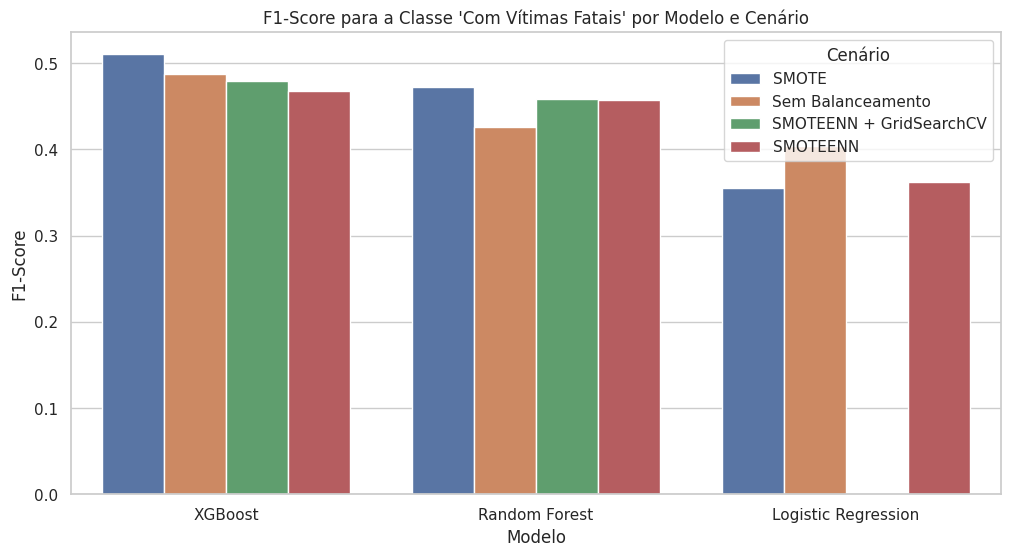

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar um gráfico de barras para o f1-score
plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='f1-score', hue='Cenário', data=results_df_sorted)
plt.title("F1-Score para a Classe 'Com Vítimas Fatais' por Modelo e Cenário")
plt.ylabel("F1-Score")
plt.xlabel("Modelo")
plt.legend(title='Cenário')
plt.show()


## Registrar o MOdelo

In [38]:
model_name = 'XGB-SMOTEEN-GS'
run_id=input('Please type RunID')
model_uri = f'runs:/{run_id}/model'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'XGB-SMOTEEN-GS' already exists. Creating a new version of this model...
Created version '2' of model 'XGB-SMOTEEN-GS'.


## Load and predict

In [40]:
model_version = 2
model_uri = f"models:/{model_name}@challenger" #/{model_version}

loaded_model = mlflow.xgboost.load_model(model_uri)
y_pred = loaded_model.predict(X_test)
y_pred[:4]


array([1, 1, 1, 1])

## Como sair do meu ambiente de desenvolvimento para o de producao

In [41]:
current_model_uri = f"models:/{model_name}@challenger"
production_model_name = "Acidentes de Trânsito sem pesos nas classes"

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'Acidentes de Trânsito sem pesos nas classes'.
Copied version '2' of model 'XGB-SMOTEEN-GS' to version '1' of model 'Acidentes de Trânsito sem pesos nas classes'.


<ModelVersion: aliases=[], creation_timestamp=1728947859154, current_stage='None', description=None, last_updated_timestamp=1728947859154, name='Acidentes de Trânsito sem pesos nas classes', run_id='a2a0abd8b07b43ddafb019f8e7fd2218', run_link=None, source='models:/XGB-SMOTEEN-GS/2', status='READY', status_message=None, tags={}, user_id=None, version=1>

[mlflowdocs](https://www.mlflow.org/docs/latest/model-registry.html#deploy-and-organize-models)

# Conclusion